In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

from tools import data_prep 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Splitting the dataset 

In [ ]:
df = data_prep()
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

In [ ]:
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.30, stratify=y, random_state=rs)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
# (7511, 126)


## Task 4.1 Neural network --default setting

Iteration 1, loss = 0.58964795
Iteration 2, loss = 0.45177474
Iteration 3, loss = 0.40806275
Iteration 4, loss = 0.38484375
Iteration 5, loss = 0.36935767
Iteration 6, loss = 0.35699076
Iteration 7, loss = 0.34710083
Iteration 8, loss = 0.33766670
Iteration 9, loss = 0.32936229
Iteration 10, loss = 0.32219213
Iteration 11, loss = 0.31491517
Iteration 12, loss = 0.30888697
Iteration 13, loss = 0.30334863
Iteration 14, loss = 0.29675402
Iteration 15, loss = 0.29146177
Iteration 16, loss = 0.28663765
Iteration 17, loss = 0.28216681
Iteration 18, loss = 0.27758995
Iteration 19, loss = 0.27280424
Iteration 20, loss = 0.27029158
Iteration 21, loss = 0.26577205
Iteration 22, loss = 0.26129818
Iteration 23, loss = 0.25790721
Iteration 24, loss = 0.25536672
Iteration 25, loss = 0.25067828
Iteration 26, loss = 0.24678953
Iteration 27, loss = 0.24457243
Iteration 28, loss = 0.24264520
Iteration 29, loss = 0.23853933
Iteration 30, loss = 0.23668792
Iteration 31, loss = 0.23395726
Iteration 32, los

Text(0.5,1,'Confusion Matrix Default NN')

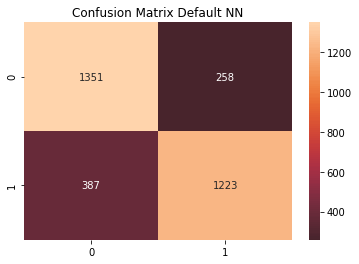

In [77]:
# Fitting model to the Training set
model = MLPClassifier(random_state=rs,verbose=True)
model.fit(X_train, y_train)

test_score=model.score(X_test, y_test)
train_score=model.score(X_train, y_train)

print(model)
print("\nTrain accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# Predicting the Test set results
y_pred = model.predict(X_test)
print('\n',classification_report(y_test, y_pred))


print('\n')

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d").set_title("Confusion Matrix Default NN")

## Task 4.2 GridSearch


In [51]:
# Build classifier model as estimator for the GridDearchCV model
model_nn = MLPClassifier(random_state=rs, warm_start =True, max_iter=1000,verbose = True)

In [9]:
# Build GridSearchCV base model
def GridSearch(model, params):
    # grid search 
    #param_grid=params
    cv = GridSearchCV(param_grid= params,
                  estimator=model, 
                  scoring= 'accuracy',
                  cv=10, 
                  n_jobs=-1)
    
    # fit the model 
    cv.fit(X_train, y_train)
    
    # Print the model architecture
    print("\n Model Description\n", cv)
    
    # Evaluation metrics
    print("Train accuracy:", cv.score(X_train, y_train))
    print("Test accuracy:", cv.score(X_test, y_test))
    
    #Print Classification Report
    y_pred = cv.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n Best Score", cv.best_score_)
    
    # Print the Best Params
    print("\n Best Param")
    print(cv.best_params_)
    
    #  Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix")

Iteration 1, loss = 0.79450565
Iteration 2, loss = 0.65662153
Iteration 3, loss = 0.58950552
Iteration 4, loss = 0.54558785
Iteration 5, loss = 0.51244268
Iteration 6, loss = 0.48703696
Iteration 7, loss = 0.46733128
Iteration 8, loss = 0.45096594
Iteration 9, loss = 0.43795477
Iteration 10, loss = 0.42713843
Iteration 11, loss = 0.41794675
Iteration 12, loss = 0.41073399
Iteration 13, loss = 0.40431531
Iteration 14, loss = 0.39918733
Iteration 15, loss = 0.39451960
Iteration 16, loss = 0.39045840
Iteration 17, loss = 0.38706753
Iteration 18, loss = 0.38391104
Iteration 19, loss = 0.38082953
Iteration 20, loss = 0.37787862
Iteration 21, loss = 0.37400557
Iteration 22, loss = 0.37099551
Iteration 23, loss = 0.36849573
Iteration 24, loss = 0.36633718
Iteration 25, loss = 0.36444967
Iteration 26, loss = 0.36265467
Iteration 27, loss = 0.36068688
Iteration 28, loss = 0.35923160
Iteration 29, loss = 0.35758597
Iteration 30, loss = 0.35570452
Iteration 31, loss = 0.35420260
Iteration 32, los

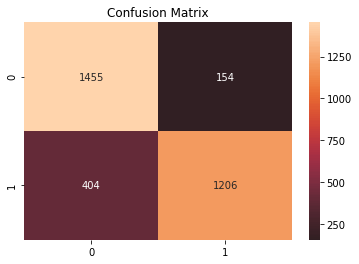

In [8]:
# Params with 1 param only
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)]}
GridSearch(model_nn)

Iteration 1, loss = 0.79622887
Iteration 2, loss = 0.69621280
Iteration 3, loss = 0.63886936
Iteration 4, loss = 0.59881099
Iteration 5, loss = 0.56511899
Iteration 6, loss = 0.53433946
Iteration 7, loss = 0.50683762
Iteration 8, loss = 0.48410629
Iteration 9, loss = 0.46452138
Iteration 10, loss = 0.44861227
Iteration 11, loss = 0.43570061
Iteration 12, loss = 0.42559875
Iteration 13, loss = 0.41737150
Iteration 14, loss = 0.41054459
Iteration 15, loss = 0.40496937
Iteration 16, loss = 0.39977084
Iteration 17, loss = 0.39561514
Iteration 18, loss = 0.39183884
Iteration 19, loss = 0.38868153
Iteration 20, loss = 0.38557752
Iteration 21, loss = 0.38301724
Iteration 22, loss = 0.38064323
Iteration 23, loss = 0.37814663
Iteration 24, loss = 0.37578868
Iteration 25, loss = 0.37400063
Iteration 26, loss = 0.37201650
Iteration 27, loss = 0.37001926
Iteration 28, loss = 0.36796752
Iteration 29, loss = 0.36629319
Iteration 30, loss = 0.36450299
Iteration 31, loss = 0.36265202
Iteration 32, los

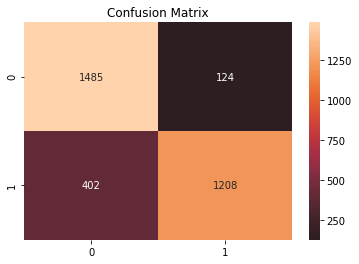

In [11]:
# Params with 2 params
params_2 = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 
          'alpha': [0.01,0.001, 0.0001,]}
GridSearch(model_nn,params_2)

Iteration 1, loss = 0.48221726
Iteration 2, loss = 0.39843040
Iteration 3, loss = 0.37763348
Iteration 4, loss = 0.36614546
Iteration 5, loss = 0.35610566
Iteration 6, loss = 0.35217094
Iteration 7, loss = 0.35312606
Iteration 8, loss = 0.34975456
Iteration 9, loss = 0.34990565
Iteration 10, loss = 0.35011831
Iteration 11, loss = 0.34793465
Iteration 12, loss = 0.34662084
Iteration 13, loss = 0.34194841
Iteration 14, loss = 0.34064303
Iteration 15, loss = 0.33983664
Iteration 16, loss = 0.33838697
Iteration 17, loss = 0.33792570
Iteration 18, loss = 0.33996112
Iteration 19, loss = 0.34131845
Iteration 20, loss = 0.33450043
Iteration 21, loss = 0.33438505
Iteration 22, loss = 0.33340980
Iteration 23, loss = 0.33391919
Iteration 24, loss = 0.33179057
Iteration 25, loss = 0.33026724
Iteration 26, loss = 0.33086783
Iteration 27, loss = 0.33128570
Iteration 28, loss = 0.33003627
Iteration 29, loss = 0.33006559
Iteration 30, loss = 0.33159119
Iteration 31, loss = 0.32701962
Iteration 32, los

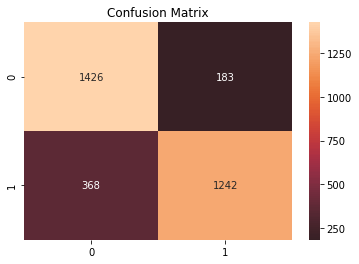

In [78]:
# Params with 6 params
params_6 = {'hidden_layer_sizes': [(2,), (3,), (4,),], #HLS=3 from last GridSearch
          'alpha': [0.001, 0.003, 0.005],# 0.001 from last GridSearch
          'activation': ['tanh', 'relu'], #added t
          'solver': ['sgd','adam'], # added
          'learning_rate': ['constant','adaptive'],
          'learning_rate_init':[0.3, 0.5,1.0]}
GridSearch(model_nn,params_6)

## Task 4.3 Feature selection (RFE,Log,Dt selection feature

In [42]:
model_lr = LogisticRegression(random_state=rs, max_iter = 10000) # converge warning @100: max_iter set to 1000

#### Running Regressor RFE 

Train accuracy: 0.8239914791638929
Test accuracy: 0.8219944082013048
             precision    recall  f1-score   support

          0       0.77      0.92      0.84      1609
          1       0.90      0.72      0.80      1610

avg / total       0.83      0.82      0.82      3219

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Text(0.5,1,'Confusion Matrix')

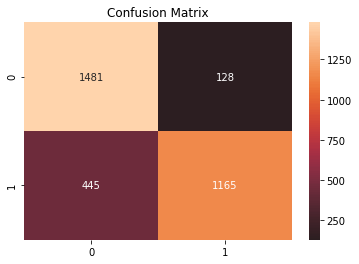

In [46]:
# using RFE in GridSearchLogistic 
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)
# grid search CV
#params = {'C': [pow(10, x) for x in range(-6, 4)]}
params = {'C': [pow(10, x) for x in range(-6, 4)],
          'penalty':['l2'],
          #'C':[0.8,1.2],
          'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']}
           # 'solver':['liblinear']}
cv = GridSearchCV(param_grid=params, estimator= model_lr, cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix")
#Train accuracy: 0.8239914791638929
#Test accuracy: 0.8219944082013048
#            precision    recall  f1-score   support

#          0       0.77      0.92      0.84      1609
#          1       0.90      0.72      0.80      1610

#### Running Regressor RFE + log transformation

In [ ]:
#Visualise numeric columns
def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(3,3, figsize=(12,12), sharex=False)

    # acquisition price plots
    sns.distplot(df['MMRAcquisitionAuctionAveragePrice'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['MMRAcquisitionAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['MMRAcquisitionRetailAveragePrice'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['MMRAcquisitonRetailCleanPrice'].dropna(), hist=False, ax=axes[1,0])

    # current price plots
    sns.distplot(df['MMRCurrentAuctionAveragePrice'].dropna(), hist=False, ax=axes[1,1])
    sns.distplot(df['MMRCurrentAuctionCleanPrice'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['MMRCurrentRetailAveragePrice'].dropna(), hist=False, ax=axes[2,0])
    sns.distplot(df['MMRCurrentRetailCleanPrice'].dropna(), hist=False, ax=axes[2,1])
    sns.distplot(df['VehBCost'].dropna(), hist=False, ax=axes[2,2]) 
    
plot_skewed_columns(df)

In [ ]:
# Transform columns and visualise
# list columns to be transformed
columns_to_transform = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','VehBCost']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)
    
# plot them again to show the distribution
plot_skewed_columns(df_log)
    

In [ ]:
# create X, y and train test data partitions
y_log = df_log['IsBadBuy']
X_log = df_log.drop(['IsBadBuy'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

In [47]:
# running RFE + log transformation
#rfe = RFECV(estimator = model_lr, cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# Original feature set 126
# Number of features after elimination 47

Original feature set 126
Number of features after elimination 47


Train accuracy: 0.8230595127146851
Test accuracy: 0.8229263746505125
             precision    recall  f1-score   support

          0       0.77      0.92      0.84      1609
          1       0.90      0.73      0.80      1610

avg / total       0.83      0.82      0.82      3219

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


Text(0.5,1,'Confusion Matrix')

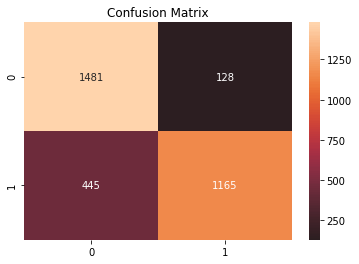

In [48]:
# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
cv = GridSearchCV(param_grid=params, estimator= model_lr, cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix Regression RFE + Log")

Iteration 1, loss = 0.66521300
Iteration 2, loss = 0.56895832
Iteration 3, loss = 0.51091360
Iteration 4, loss = 0.47544894
Iteration 5, loss = 0.45200065
Iteration 6, loss = 0.43557623
Iteration 7, loss = 0.42334185
Iteration 8, loss = 0.41366596
Iteration 9, loss = 0.40639909
Iteration 10, loss = 0.40085274
Iteration 11, loss = 0.39644540
Iteration 12, loss = 0.39282308
Iteration 13, loss = 0.38977437
Iteration 14, loss = 0.38678432
Iteration 15, loss = 0.38434135
Iteration 16, loss = 0.38208250
Iteration 17, loss = 0.37996954
Iteration 18, loss = 0.37798888
Iteration 19, loss = 0.37632228
Iteration 20, loss = 0.37468462
Iteration 21, loss = 0.37298003
Iteration 22, loss = 0.37176416
Iteration 23, loss = 0.37041481
Iteration 24, loss = 0.36930015
Iteration 25, loss = 0.36792798
Iteration 26, loss = 0.36651001
Iteration 27, loss = 0.36556589
Iteration 28, loss = 0.36399957
Iteration 29, loss = 0.36290743
Iteration 30, loss = 0.36171895
Iteration 31, loss = 0.36079285
Iteration 32, los

Text(0.5,1,'CM Neural Netwith Regression RFE')

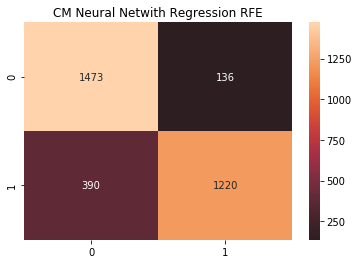

In [54]:
# Network using best params from neural network Grid Search and 50 input features from Regression RFE
model_nn_reg_RFE = GridSearchCV(param_grid= params_2, estimator=model_nn, scoring= 'accuracy',cv=10, n_jobs=-1)
    
# fit the model 
model_nn_reg_RFE.fit(X_train_sel, y_train)
    
# Print the model architecture
print("\n Model Description\n", model_nn_reg_RFE)
    
# Evaluation metrics
print("Train accuracy:", model_nn_reg_RFE.score(X_train_sel, y_train))
print("Test accuracy:", model_nn_reg_RFE.score(X_test_sel, y_test))
    
#Print Classification Report
y_pred = model_nn_reg_RFE.predict(X_test_sel)
print('\n',classification_report(y_test, y_pred))

print("\n Best Score", model_nn_reg_RFE.best_score_)
    
# Print the Best Params
print("\n Best Param")
print(model_nn_reg_RFE.best_params_)
    
#  Making the Confusion Matrix
#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Neural Netwith Regression RFE")

Iteration 1, loss = 0.68681949
Iteration 2, loss = 0.63252543
Iteration 3, loss = 0.58880290
Iteration 4, loss = 0.55231506
Iteration 5, loss = 0.52259763
Iteration 6, loss = 0.49843966
Iteration 7, loss = 0.47938229
Iteration 8, loss = 0.46418725
Iteration 9, loss = 0.45209469
Iteration 10, loss = 0.44232420
Iteration 11, loss = 0.43436094
Iteration 12, loss = 0.42778545
Iteration 13, loss = 0.42227051
Iteration 14, loss = 0.41757274
Iteration 15, loss = 0.41365408
Iteration 16, loss = 0.41010699
Iteration 17, loss = 0.40668152
Iteration 18, loss = 0.40346755
Iteration 19, loss = 0.40047572
Iteration 20, loss = 0.39777669
Iteration 21, loss = 0.39541372
Iteration 22, loss = 0.39320259
Iteration 23, loss = 0.39115082
Iteration 24, loss = 0.38887635
Iteration 25, loss = 0.38716647
Iteration 26, loss = 0.38546890
Iteration 27, loss = 0.38365369
Iteration 28, loss = 0.38225599
Iteration 29, loss = 0.38086452
Iteration 30, loss = 0.37938567
Iteration 31, loss = 0.37799911
Iteration 32, los

Text(0.5,1,'CM Neural Net model_nn_reg_RFELog')

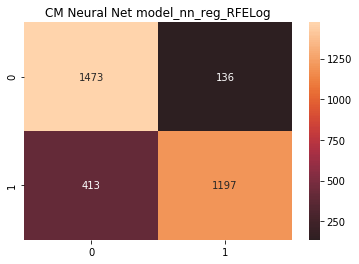

In [79]:
# Network using best params from neural network Grid Search and 50 input features from Regression RFE + Log
model_nn_reg_RFELog = GridSearchCV(param_grid= params_2, estimator=model_nn, scoring= 'accuracy',cv=10, n_jobs=-1)
    
# fit the model 
model_nn_reg_RFELog.fit(X_train_sel_log, y_train_log)
    
# Print the model architecture
print("\n Model Description\n", model_nn_reg_RFELog)
    
# Evaluation metrics
print("Train accuracy:", model_nn_reg_RFELog.score(X_train_sel_log, y_train_log))
print("Test accuracy:", model_nn_reg_RFELog.score(X_test_sel_log, y_test_log))
    
#Print Classification Report
y_pred = model_nn_reg_RFELog.predict(X_test_sel_log)
print('\n',classification_report(y_test_log, y_pred_log))
print("\n Best Score", model_nn_reg_RFE.best_score_)
    
# Print the Best Params
print("\n Best Param")
print(model_nn_reg_RFE.best_params_)
    
#  Making the Confusion Matrix
#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Neural Net model_nn_reg_RFELog")

#### Decision Tree feature selection

In [71]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 8),
          'min_samples_leaf': range(20, 61, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)
#analyse_feature_importance(cv.best_estimator_, X_log.columns)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 8), 'min_samples_leaf': range(20, 61, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
#importances =cv.best_estimator_, X_log.columns)
# grab feature importances from the model

dm_model = cv.best_estimator_
importances = dm_model.feature_importances_   
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{X_log.columns[i]:<35}:{importances[i]}")



*********** Feature Importances ************

Auction_ADESA                      :0.5176540074804418
MMRCurrentAuctionAveragePrice      :0.13174921064149606
VNST_OK                            :0.08327287541916883
VNST_CO                            :0.046980374393189514
VNST_AZ                            :0.041939879545988185
VNST_PA                            :0.026387168478151042
Auction_MANHEIM                    :0.024844892828453393
VNST_MO                            :0.023951674346237097
VehBCost                           :0.023357179241310644
WheelType_Covers                   :0.021930342177082365
VNST_CA                            :0.013959942257897904
VNST_NC                            :0.01197805445920417
MMRCurrentRetailRatio              :0.007710191209249742
VNST_FL                            :0.0062271442202155745
VNST_VA                            :0.004565215501667725
VNST_TX                            :0.0042783638161687145
MMRAcquisitionAuctionAveragePrice  :0.00377

In [73]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)\
# (7511, 12)

(7511, 12)


Iteration 1, loss = 0.73648625
Iteration 2, loss = 0.67080083
Iteration 3, loss = 0.62447537
Iteration 4, loss = 0.59012099
Iteration 5, loss = 0.56288563
Iteration 6, loss = 0.54086770
Iteration 7, loss = 0.52285228
Iteration 8, loss = 0.50804105
Iteration 9, loss = 0.49612988
Iteration 10, loss = 0.48607655
Iteration 11, loss = 0.47765043
Iteration 12, loss = 0.47042893
Iteration 13, loss = 0.46419602
Iteration 14, loss = 0.45875398
Iteration 15, loss = 0.45413551
Iteration 16, loss = 0.45010624
Iteration 17, loss = 0.44669364
Iteration 18, loss = 0.44368681
Iteration 19, loss = 0.44119852
Iteration 20, loss = 0.43904657
Iteration 21, loss = 0.43715404
Iteration 22, loss = 0.43552833
Iteration 23, loss = 0.43404135
Iteration 24, loss = 0.43237971
Iteration 25, loss = 0.43076313
Iteration 26, loss = 0.42925666
Iteration 27, loss = 0.42773450
Iteration 28, loss = 0.42655762
Iteration 29, loss = 0.42552538
Iteration 30, loss = 0.42467394
Iteration 31, loss = 0.42378300
Iteration 32, los

Text(0.5,1,'CM Decision Tree feature selection ')

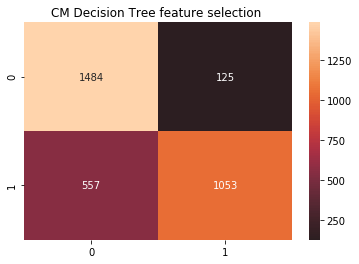

In [75]:
#params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_2, estimator=model_nn, cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv.score(X_train_sel_model, y_train))
print("Test accuracy:", cv.score(X_test_sel_model, y_test))

y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Decision Tree feature selection ")

Task 5

# Task 5 Comparing Models

In [2]:
# To start here

In [ ]:
# grid search CV for decision tree
params_dt = {'criterion': ['gini'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(40, 61, 5)}

cv = GridSearchCV(param_grid=params_dt, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression
params_log_reg = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params_log_reg, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

log_reg_model = cv.best_estimator_
print(log_reg_model)

# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_nn, estimator=MLPClassifier(max_iter=500, random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

nn_model = cv.best_estimator_
print(nn_model)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

print("Accuracy score on test for DT:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test, y_pred_nn))